In [1]:
import tweepy as tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
key = "d83LOq2Cbe2vdc2qNSIrAk0eT"
secret = "3meeaIpYOk6d7qRq3MLjncUDeARzUSmXB8S8Yb9PogfU4mkTit"


auth = tp.OAuthHandler(key, secret)
api = tp.API(auth, wait_on_rate_limit=True)
print("Authentication Complete!!!")

Authentication Complete!!!


In [3]:
hashtag = "#cloudcomputing"
query = tp.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

for tweet in tweets:
    print(tweet)

{'Tweet': 'RT @karkidijob: Data Science, AI/ML Jobs in USA #hiring | Karkidi https://t.co/CGLDv7fJ8x #BigData #Analytics #DataScience #AI #MachineLear…', 'Timestamp': datetime.datetime(2022, 3, 10, 15, 5, 59, tzinfo=datetime.timezone.utc)}
{'Tweet': 'Factors to consider for #CCaaS &amp; #UCaaS :\n1. Why you need these solutions\n2. Functionalities, Features\n3. Timeline,… https://t.co/BjTprnexMX', 'Timestamp': datetime.datetime(2022, 3, 10, 15, 5, 49, tzinfo=datetime.timezone.utc)}
{'Tweet': 'Data Science, AI/ML Jobs in USA #hiring | Karkidi https://t.co/CGLDv7fJ8x #BigData #Analytics #DataScience #AI… https://t.co/YN4aDNtrbA', 'Timestamp': datetime.datetime(2022, 3, 10, 15, 5, 42, tzinfo=datetime.timezone.utc)}
{'Tweet': 'Attention #ITpros – we’ve added a new view in Nureva® Console that lets you see your rooms at a glance. Find out mo… https://t.co/qwROhwJuyA', 'Timestamp': datetime.datetime(2022, 3, 10, 15, 5, 1, tzinfo=datetime.timezone.utc)}
{'Tweet': 'Cloud computing and the meta

In [4]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,"RT @karkidijob: Data Science, AI/ML Jobs in US...",2022-03-10 15:05:59+00:00
1,Factors to consider for #CCaaS &amp; #UCaaS :\...,2022-03-10 15:05:49+00:00
2,"Data Science, AI/ML Jobs in USA #hiring | Kark...",2022-03-10 15:05:42+00:00
3,Attention #ITpros – we’ve added a new view in ...,2022-03-10 15:05:01+00:00
4,Cloud computing and the metaverse #CloudComput...,2022-03-10 15:03:59+00:00


In [5]:
aws = ['AWS', 'Amazon Web Services', 'aws', 'amazon web services']
azure = ['Microsoft Azure', 'azure', 'Azure', 'microsoft azure']
gcp = ['Google Cloud','Gcp','gcp','google cloud services','google cloud']

In [6]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['aws'] = df['Tweet'].apply(lambda x: identify_subject(x, aws)) 
df['azure'] = df['Tweet'].apply(lambda x: identify_subject(x, azure))
df['gcp'] = df['Tweet'].apply(lambda x: identify_subject(x, gcp))

df.head(10)

,Tweet,Timestamp,aws,azure,gcp
0,"RT @karkidijob: Data Science, AI/ML Jobs in US...",2022-03-10 15:05:59+00:00,0,0,0
1,Factors to consider for #CCaaS &amp; #UCaaS :\...,2022-03-10 15:05:49+00:00,0,0,0
2,"Data Science, AI/ML Jobs in USA #hiring | Kark...",2022-03-10 15:05:42+00:00,0,0,0
3,Attention #ITpros – we’ve added a new view in ...,2022-03-10 15:05:01+00:00,0,0,0
4,Cloud computing and the metaverse #CloudComput...,2022-03-10 15:03:59+00:00,0,0,0
5,RT @Sheraj99: Network Security Illustrated #Py...,2022-03-10 15:02:23+00:00,0,0,0
6,RT @WomanTech_IT: Happy Women's History Month!...,2022-03-10 15:02:20+00:00,0,0,0
7,RT @WomanTech_IT: Happy Women's History Month!...,2022-03-10 15:02:19+00:00,0,0,0
8,Network infrastructure is only increasing in c...,2022-03-10 15:02:11+00:00,0,0,0
9,RT @WomanTech_IT: Happy Women's History Month!...,2022-03-10 15:01:47+00:00,0,0,0


In [7]:
print(df['gcp'].unique())
print(df['aws'].unique())
print(df['azure'].unique())

[0 1]
[0 1]
[0 1]


In [8]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
!python3 -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/deepak/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/deepak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deepak/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/deepak/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/deepak/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [11]:
import nltk
nltk.download('omw-1.4')
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

[nltk_data] Downloading package omw-1.4 to /Users/deepak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tweet,Timestamp,aws,azure,gcp,Processed Tweet
0,"RT @karkidijob: Data Science, AI/ML Jobs in US...",2022-03-10 15:05:59+00:00,0,0,0,"@karkidijob: Data Science, AI/ML Jobs USA #hir..."
1,Factors to consider for #CCaaS &amp; #UCaaS :\...,2022-03-10 15:05:49+00:00,0,0,0,Factors consider #CCaaS &amp; #UCaaS : 1. Why ...
2,"Data Science, AI/ML Jobs in USA #hiring | Kark...",2022-03-10 15:05:42+00:00,0,0,0,"Data Science, AI/ML Jobs USA #hiring | Karkidi..."
3,Attention #ITpros – we’ve added a new view in ...,2022-03-10 15:05:01+00:00,0,0,0,Attention #ITpros – we’ve added new view Nurev...
4,Cloud computing and the metaverse #CloudComput...,2022-03-10 15:03:59+00:00,0,0,0,Cloud computing metaverse #CloudComputing via ...


In [12]:
print(len(df.aws[df.aws==1]))
print(len(df.gcp[df.gcp==1]))
print(len(df.azure[df.azure==1]))

89
22
25


[]

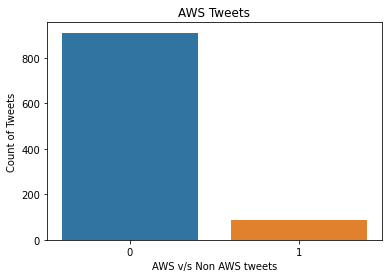

In [13]:
sns.countplot(x=df.aws)
plt.xlabel("AWS v/s Non AWS tweets")
plt.ylabel("Count of Tweets")
plt.title("AWS Tweets")
plt.plot()

<AxesSubplot:xlabel='azure', ylabel='count'>

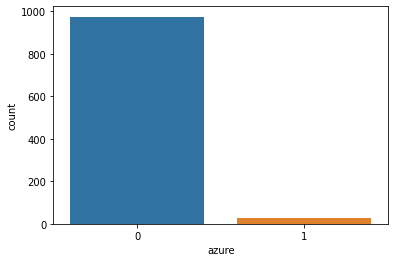

In [14]:
sns.countplot(x=df.azure)

In [15]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'aws', 'gcp', 'azure', 'subjectivity']].head()

,Processed Tweet,aws,gcp,azure,subjectivity
0,"@karkidijob: Data Science, AI/ML Jobs USA #hir...",0,0,0,0.000000
1,Factors consider #CCaaS &amp; #UCaaS : 1. Why ...,0,0,0,0.000000
2,"Data Science, AI/ML Jobs USA #hiring | Karkidi...",0,0,0,0.000000
3,Attention #ITpros – we’ve added new view Nurev...,0,0,0,0.454545
4,Cloud computing metaverse #CloudComputing via ...,0,0,0,0.000000


In [16]:
def getanalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getanalysis)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


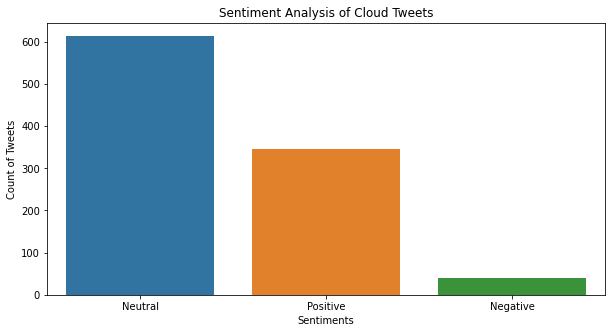

In [17]:
plt.rcParams["figure.figsize"] = (10,5)


sns.countplot(df.Analysis)
plt.xlabel("Sentiments")
plt.ylabel("Count of Tweets")
plt.title("Sentiment Analysis of Cloud Tweets")
plt.show()

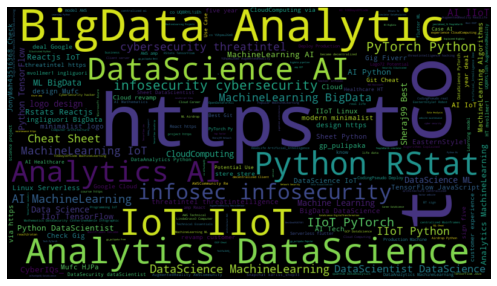

In [18]:
plt.rcParams["figure.figsize"] = (10,5)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

allwords = ''.join([twts for twts in df['Processed Tweet']])
wordcloud = WordCloud(width=800,height=450,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


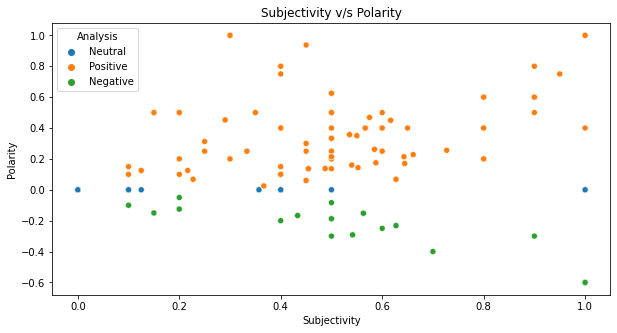

In [19]:
plt.rcParams["figure.figsize"] = (10,5)

sns.scatterplot(df.subjectivity,df.polarity,hue=df.Analysis)
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")
plt.title("Subjectivity v/s Polarity")
plt.show()

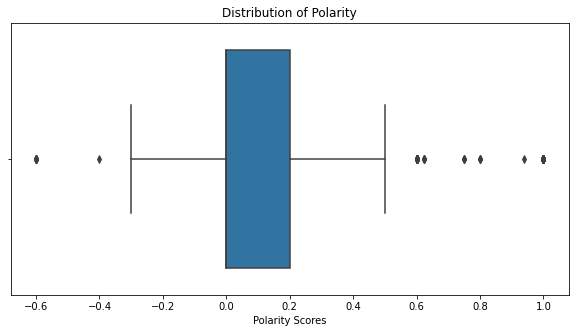

In [20]:
sns.boxplot(x=df['polarity'])
plt.xlabel("Polarity Scores")
plt.title("Distribution of Polarity")
plt.show()